In [1]:
#본격적 실습 전에 kmeans 간단하게 보기

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

iris=load_iris()
irisDF = pd.DataFrame(data = iris.data[:, 2:], columns=['petal_length', 'petal_width'])
irisDF.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [3]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, random_state=77).fit(irisDF)
print(kmeans.labels_)

c:\Anaconda3\envs\mainstudy\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]


In [4]:
kmeans.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [5]:
irisDF['species'] = iris.target
x_kc = kmeans.cluster_centers_[:, 0]
y_kc = kmeans.cluster_centers_[:, 1]

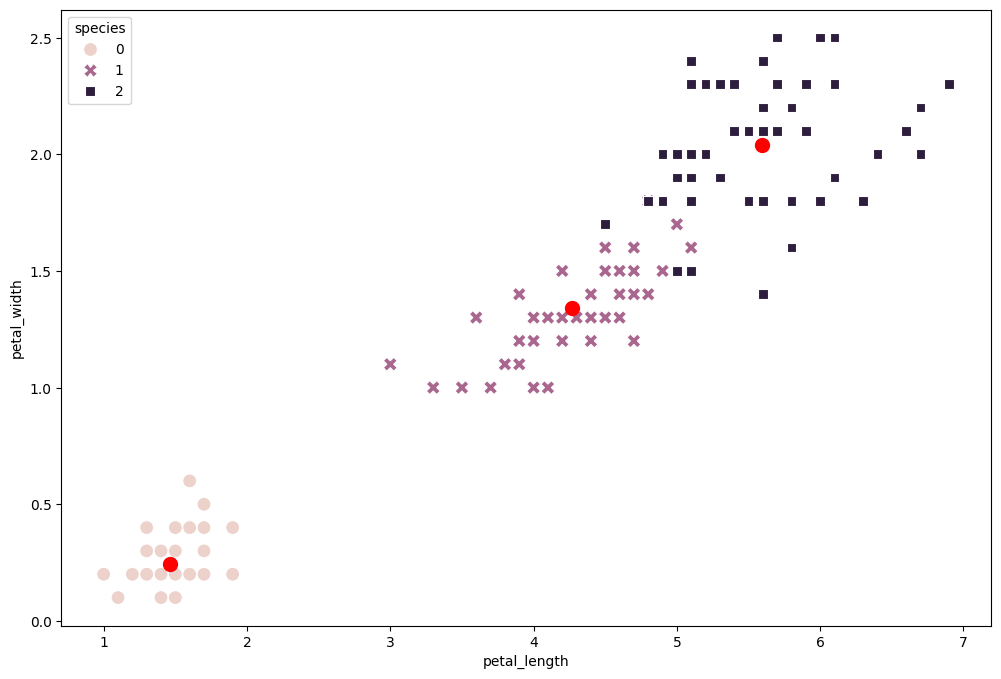

In [6]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.scatterplot(data=irisDF, x='petal_length', y='petal_width', hue='species', style='species', s=100)
plt.scatter(x_kc, y_kc, s=100, color='r')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

In [7]:
import pandas as pd
import warnings

warnings.filterwarnings(action='ignore')

raw_data = pd.read_csv('uci-secom.csv')
raw_data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [8]:
raw_data.isna().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [9]:
raw_data.dropna()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail


In [10]:
raw_data.drop(columns=['Time'], inplace=True)
preprocessed_data = raw_data.fillna(raw_data.mean())
preprocessed_data.isna().sum()

0            0
1            0
2            0
3            0
4            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 591, dtype: int64

In [11]:
fail_rate = round(preprocessed_data['Pass/Fail'].value_counts()/len(preprocessed_data)*100, 2)
print(fail_rate)

-1    93.36
 1     6.64
Name: Pass/Fail, dtype: float64


Text(0.5, 1.0, 'Pass/Fail distribution \n (-1: Pass and 1: Fail)')

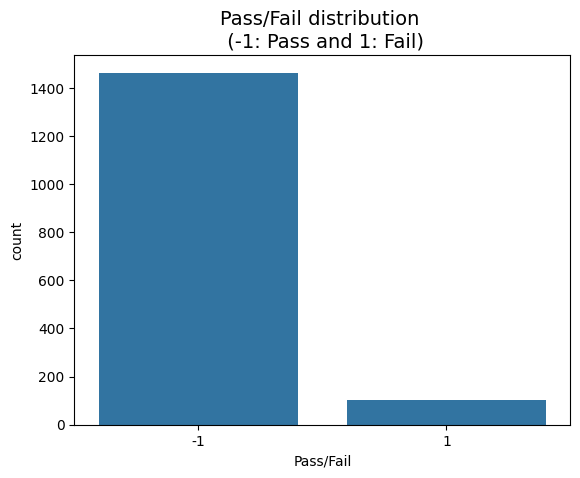

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=preprocessed_data, x='Pass/Fail')
plt.title('Pass/Fail distribution \n (-1: Pass and 1: Fail)', fontsize=14)

<Axes: >

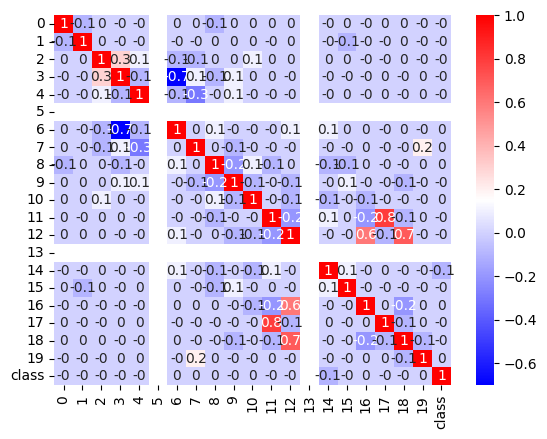

In [13]:
heatmap_data = preprocessed_data.iloc[:, :20]
heatmap_data['class'] = preprocessed_data.iloc[:,-1]
correlation_matrix = heatmap_data.corr(numeric_only=True).round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap="bwr")

In [14]:
#feature의 모든 값이 동일한 경우 corr()함수는 nan로 값 반환.
#heatmap에서 공백으로 표시됨.
preprocessed_data.iloc[:, :20]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.500500,0.016200,-0.003400,0.945500,202.439600,0.0,7.955800,414.871000,10.043300,0.968000,192.396300,12.5190
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.496600,-0.000500,-0.014800,0.962700,200.547000,0.0,10.154800,414.734700,9.259900,0.970100,191.287200,12.4608
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.443600,0.004100,0.001300,0.961500,202.017900,0.0,9.515700,416.707500,9.314400,0.967400,192.703500,12.5404
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.488200,-0.012400,-0.003300,0.962900,201.848200,0.0,9.605200,422.289400,9.692400,0.968700,192.155700,12.4782
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.503100,-0.003100,-0.007200,0.956900,201.942400,0.0,10.566100,420.592500,10.338700,0.973500,191.603700,12.4735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.342400,-0.004500,-0.005700,0.957900,203.986700,0.0,11.769200,419.340400,10.239700,0.969300,193.747000,12.5373
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.433300,-0.006100,-0.009300,0.961800,204.017300,0.0,9.162000,405.817800,10.228500,0.969600,193.788900,12.4020
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.462862,-0.000841,0.000146,0.964353,199.956809,0.0,9.005371,413.086035,9.907603,0.971444,190.047354,12.4555
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.462200,-0.007200,0.003200,0.969400,197.244800,0.0,9.735400,401.915300,9.863000,0.974000,187.381800,12.3937


In [15]:
correlation_matrix

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,class
0,1.0,-0.1,0.0,-0.0,-0.0,NaN,0.0,0.0,-0.1,0.0,...,0.0,0.0,NaN,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0
1,-0.1,1.0,0.0,-0.0,-0.0,NaN,-0.0,-0.0,0.0,0.0,...,-0.0,0.0,NaN,-0.0,-0.1,-0.0,-0.0,0.0,-0.0,-0.0
2,0.0,0.0,1.0,0.3,0.1,NaN,-0.1,-0.1,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0
3,-0.0,-0.0,0.3,1.0,-0.1,NaN,-0.7,0.1,-0.1,0.1,...,0.0,-0.0,NaN,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0
4,-0.0,-0.0,0.1,-0.1,1.0,NaN,-0.1,-0.3,-0.0,0.1,...,-0.0,-0.0,NaN,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,-0.0,-0.1,-0.7,-0.1,NaN,1.0,0.0,0.1,-0.0,...,-0.0,0.1,NaN,0.1,0.0,0.0,-0.0,0.0,-0.0,0.0
7,0.0,-0.0,-0.1,0.1,-0.3,NaN,0.0,1.0,0.0,-0.1,...,-0.0,-0.0,NaN,-0.0,-0.0,0.0,-0.0,-0.0,0.2,0.0
8,-0.1,0.0,0.0,-0.1,-0.0,NaN,0.1,0.0,1.0,-0.2,...,-0.1,0.0,NaN,-0.1,-0.1,0.0,-0.0,-0.0,0.0,0.0
9,0.0,0.0,0.0,0.1,0.1,NaN,-0.0,-0.1,-0.2,1.0,...,-0.0,-0.1,NaN,-0.0,0.1,-0.0,-0.0,-0.1,-0.0,-0.0


In [16]:
#상관계수가 절댓값 0.01보다 큰 feature의 개수 확인
import numpy as np
correlation_data_all = preprocessed_data.iloc[:,:]
correlation_matrix_all = correlation_data_all.corr(numeric_only=True).round(2)
corr_data = (correlation_matrix_all['Pass/Fail'] >=0.01) | (correlation_matrix_all['Pass/Fail'] <= -0.01)
np.unique(corr_data, return_counts = True)

(array([False,  True]), array([171, 420], dtype=int64))

In [17]:
correlation_matrix_all.sort_values(by="Pass/Fail", ascending=False).head(10)

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
Pass/Fail,-0.03,-0.00,-0.00,-0.02,-0.01,NaN,0.02,0.01,0.03,-0.03,...,-0.01,0.05,0.01,0.01,0.01,0.00,0.04,0.03,-0.00,1.00
59,-0.11,0.01,0.04,-0.02,-0.02,NaN,0.06,0.01,0.05,-0.03,...,-0.02,-0.04,-0.03,-0.02,-0.03,-0.04,-0.01,-0.01,0.04,0.16
103,-0.07,0.03,0.04,-0.09,-0.00,NaN,0.05,0.01,0.08,-0.08,...,0.02,0.05,0.03,0.03,0.03,-0.08,-0.00,0.01,0.04,0.15
348,-0.02,0.01,0.01,-0.06,-0.01,NaN,0.03,-0.01,0.02,-0.05,...,-0.01,0.11,0.00,0.01,0.00,-0.04,-0.00,0.01,0.02,0.13
510,-0.06,0.02,0.02,-0.08,-0.00,NaN,0.06,0.03,0.10,-0.03,...,0.02,0.02,0.03,0.03,0.03,-0.04,0.03,0.03,0.03,0.13
431,-0.04,0.05,0.02,-0.06,-0.00,NaN,0.05,-0.00,0.08,-0.04,...,0.05,0.02,-0.01,-0.01,-0.01,-0.02,0.05,0.03,0.03,0.12
430,-0.06,0.05,0.02,-0.04,-0.00,NaN,0.04,-0.01,0.07,-0.05,...,0.04,0.00,0.02,0.03,0.02,-0.03,0.07,0.05,0.05,0.11
434,-0.06,0.05,0.02,-0.04,-0.01,NaN,0.04,-0.00,0.06,-0.04,...,0.05,0.02,-0.00,-0.00,-0.00,-0.02,0.06,0.05,0.04,0.11
435,-0.07,0.05,0.03,-0.04,-0.01,NaN,0.04,-0.01,0.06,-0.04,...,0.05,0.03,-0.01,-0.01,-0.01,-0.02,0.06,0.05,0.04,0.11
436,-0.06,0.05,0.03,-0.04,-0.01,NaN,0.04,-0.01,0.06,-0.04,...,0.05,0.03,-0.01,-0.00,-0.01,-0.02,0.07,0.05,0.05,0.11


In [18]:
from sklearn.model_selection import train_test_split

X = preprocessed_data.iloc[:,:-1]
y = preprocessed_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)
print(X_train)
print(y_train)

            0        1          2          3       4      5         6       7  \
616   3020.40  2690.55  2171.8556   940.9917  1.2906  100.0  103.4733  0.1234   
718   2992.33  2513.22  2229.3333  1553.3158  1.5123  100.0  102.7800  0.1235   
570   3006.39  2496.55  2220.4778  1531.6980  1.7751  100.0  107.6856  0.1249   
1330  2996.01  2541.13  2205.2555  1412.7131  0.9785  100.0   95.2556  0.1216   
1383  2875.39  2499.15  2216.8333  1468.5974  1.7074  100.0   95.9856  0.1203   
...       ...      ...        ...        ...     ...    ...       ...     ...   
181   2997.07  2543.11  2256.1222  1226.2217  1.4656  100.0  106.3122  0.1209   
283   2969.01  2537.88  2194.6444   999.4387  1.3259  100.0  101.9767  0.1205   
374   2993.48  2502.34  2218.0555  1517.4371  0.8579  100.0  105.8133  0.1206   
978   3041.48  2494.58  2213.9111  1973.9690  1.2541  100.0   96.9456  0.1238   
891   3074.96  2448.82  2315.2667  2360.1325  1.1259  100.0   90.1144  0.1160   

           8       9  ...  

In [19]:
np.unique(y_train, return_counts=True)

(array([-1,  1], dtype=int64), array([1023,   73], dtype=int64))

In [20]:
tmp = np.unique(y_train, return_counts=True)[1]
print(tmp)
tmp[1]/len(y_train)*100

[1023   73]


6.660583941605839

In [21]:
np.unique(y_test, return_counts=True)

(array([-1,  1], dtype=int64), array([440,  31], dtype=int64))

In [22]:
tmp = np.unique(y_test, return_counts=True)[1]
print(tmp)
tmp[1] / len(y_test)*100

[440  31]


6.581740976645436

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    return acc, pre, re, f1, auc

In [24]:
def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    print('=> 오차 행렬')
    print(confusion)
    print('============')
    
    print('정확도: {0:.4f}, 정밀도: {1:.4f}'.format(acc,pre))
    print('재현율: {0:.4}, F1: {1:.4f}, AUC: {2:.4F}'.format(re, f1, auc))

In [25]:
#logistir regression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred1 = lr_clf.predict_proba(X_test)[:,1]

print_clf_eval(y_test, lr_pred)

=> 오차 행렬
[[417  23]
 [ 25   6]]
정확도: 0.8981, 정밀도: 0.2069
재현율: 0.1935, F1: 0.2000, AUC: 0.5706


In [26]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=3)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

=> 오차 행렬
[[434   6]
 [ 31   0]]
정확도: 0.9214, 정밀도: 0.0000
재현율: 0.0, F1: 0.0000, AUC: 0.4932


In [27]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=30, bootstrap=False)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

=> 오차 행렬
[[439   1]
 [ 30   1]]
정확도: 0.9342, 정밀도: 0.5000
재현율: 0.03226, F1: 0.0606, AUC: 0.5150


In [34]:
#light GBM
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(random_state=13, n_jobs=-1, verbose=-1)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

=> 오차 행렬
[[440   0]
 [ 31   0]]
정확도: 0.9342, 정밀도: 0.0000
재현율: 0.0, F1: 0.0000, AUC: 0.5000


In [35]:
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    return get_clf_eval(y_test, pred)

In [36]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']

def get_result_pd(models, model_names, X_train, y_Train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp = []
    
    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))
    
    return pd.DataFrame(tmp, columns=col_names, index=model_names)
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)
results

,accuracy,precision,recall,f1,roc_auc
LogisticReg,0.898089,0.206897,0.193548,0.200000,0.570638
DecisionTree,0.921444,0.000000,0.000000,0.000000,0.493182
RandomForest,0.934183,0.500000,0.032258,0.060606,0.514993
LightGBM,0.934183,0.000000,0.000000,0.000000,0.500000


<Axes: >

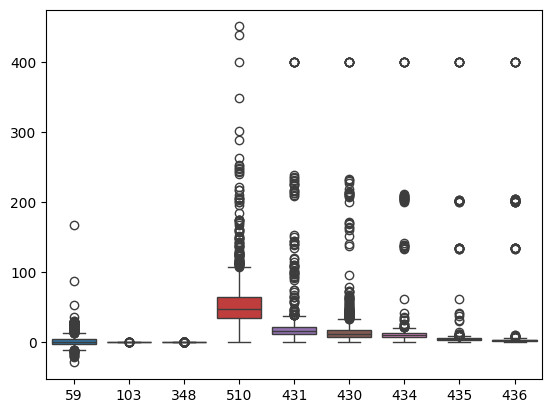

In [37]:
sns.boxplot(data=preprocessed_data[['59', '103', '348', '510', '431','430','434','435','436']])

In [39]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MMS = MinMaxScaler()
SS = StandardScaler()

X_mms = MMS.fit_transform(X)
X_ss = SS.fit_transform(X)

X_mms_pd = pd.DataFrame(X_mms, columns=X.columns)
X_ss_pd = pd.DataFrame(X_ss, columns=X.columns)

<Axes: >

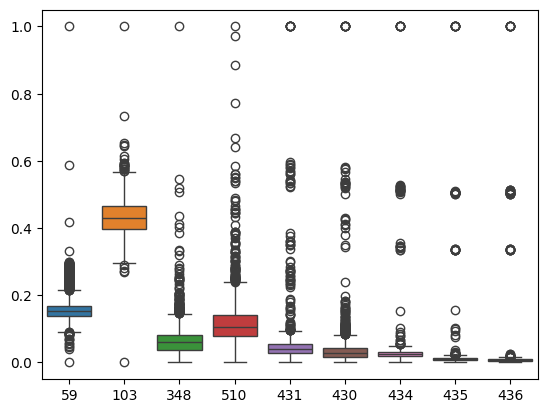

In [40]:
sns.boxplot(data=X_mms_pd[['59', '103', '348', '510', '431','430','434','435','436']])

<Axes: >

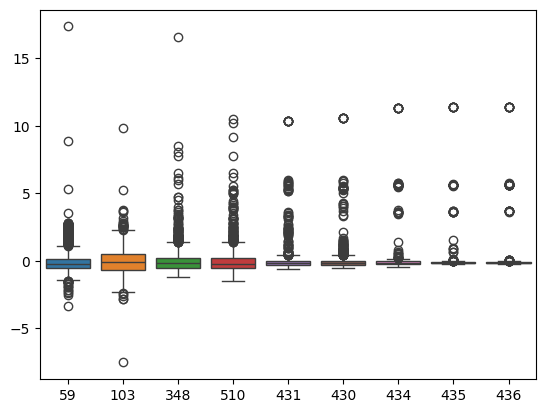

In [41]:
sns.boxplot(data=X_ss_pd[['59', '103', '348', '510', '431','430','434','435','436']])

In [43]:
#minmax 스케일러 학습 결과
X_train_mms, X_test_mms, y_train_mms, y_test_mms = train_test_split(X_mms, y, test_size=0.3, random_state=13, stratify=y)
results_mms = get_result_pd(models, model_names, X_train_mms, y_train_mms, X_test_mms, y_test_mms)
results_mms

,accuracy,precision,recall,f1,roc_auc
LogisticReg,0.925690,0.0,0.000000,0.000000,0.495455
DecisionTree,0.921444,0.0,0.000000,0.000000,0.493182
RandomForest,0.934183,0.5,0.032258,0.060606,0.514993
LightGBM,0.932059,0.0,0.000000,0.000000,0.498864


In [44]:
#standard 스케일러 학습 결과
X_train_ss, X_test_ss, y_train_ss, y_test_ss = train_test_split(X_ss, y, test_size=0.3, random_state=13, stratify=y)
results_ss = get_result_pd(models, model_names, X_train_ss, y_train_ss, X_test_ss, y_test_ss)
results_ss

,accuracy,precision,recall,f1,roc_auc
LogisticReg,0.885350,0.171429,0.193548,0.181818,0.563820
DecisionTree,0.921444,0.000000,0.000000,0.000000,0.493182
RandomForest,0.934183,0.500000,0.032258,0.060606,0.514993
LightGBM,0.934183,0.000000,0.000000,0.000000,0.500000


In [45]:
def get_outlier(df=None, column=None, weight=1.5):
    fraud=df[column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    
    return outlier_index

In [46]:
#상관 계수 가장 높았던 feature의 이상치 제거 후 성능 확인
outlier_index = get_outlier(df=preprocessed_data, column='59')
preprocessed_data.drop(outlier_index, axis=0, inplace=True)
preprocessed_data.shape

(1366, 591)

In [47]:
X = preprocessed_data.iloc[:,:-1]
y = preprocessed_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)
results


,accuracy,precision,recall,f1,roc_auc
LogisticReg,0.926829,0.285714,0.285714,0.285714,0.623577
DecisionTree,0.934146,0.000000,0.000000,0.000000,0.492288
RandomForest,0.941463,0.000000,0.000000,0.000000,0.496144
LightGBM,0.948780,0.000000,0.000000,0.000000,0.500000


In [48]:
#상관계수 높았던 다른 feature도 이상치 제거 후 성능 확인
temp_feature_name = ['103', '348', '510', '431','430','434','435','436']

for column_name in temp_feature_name:
    outlier_index = get_outlier(df = preprocessed_data, column = column_name)
    preprocessed_data.drop(outlier_index, axis=0, inplace=True)
    
preprocessed_data.shape  

(1058, 591)

In [49]:
X = preprocessed_data.iloc[:, 1:-1]
y = preprocessed_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y )

results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)
results

,accuracy,precision,recall,f1,roc_auc
LogisticReg,0.905660,0.05,0.083333,0.062500,0.510621
DecisionTree,0.952830,0.20,0.083333,0.117647,0.535131
RandomForest,0.962264,0.00,0.000000,0.000000,0.500000
LightGBM,0.962264,0.00,0.000000,0.000000,0.500000


In [51]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [52]:
#오버 샘플링
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

preprocessed_data = raw_data.fillna(raw_data.mean())
X = preprocessed_data.iloc[:, 1:-1]
y = preprocessed_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (1096, 589) (1096,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (2046, 589) (2046,)
SMOTE 적용 후 레이블 값 분포: 
 -1    1023
 1    1023
Name: Pass/Fail, dtype: int64


In [53]:
lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train_over, y_train_over)
lr_clf_pred = lr_clf.predict(X_test)
lr_pred2 = lr_clf.predict_proba(X_test)[:,1]

print_clf_eval(y_test, lr_clf_pred)

=> 오차 행렬
[[386  54]
 [ 20  11]]
정확도: 0.8429, 정밀도: 0.1692
재현율: 0.3548, F1: 0.2292, AUC: 0.6161


In [54]:
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=3)
dt_clf.fit(X_train_over, y_train_over)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

=> 오차 행렬
[[359  81]
 [ 20  11]]
정확도: 0.7856, 정밀도: 0.1196
재현율: 0.3548, F1: 0.1789, AUC: 0.5854


In [55]:
rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=30, bootstrap=False)
rf_clf.fit(X_train_over, y_train_over)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

=> 오차 행렬
[[437   3]
 [ 31   0]]
정확도: 0.9278, 정밀도: 0.0000
재현율: 0.0, F1: 0.0000, AUC: 0.4966


In [56]:
lgbm_clf = LGBMClassifier(random_state=13, n_jobs=-1, verbose=-1)
lgbm_clf.fit(X_train_over, y_train_over)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

=> 오차 행렬
[[436   4]
 [ 30   1]]
정확도: 0.9278, 정밀도: 0.2000
재현율: 0.03226, F1: 0.0556, AUC: 0.5116
